In [1]:
import numpy as np
import cv2
import sys
import matplotlib.pyplot as plt

### 영상의 히스토그램

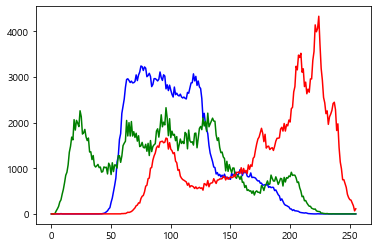

In [5]:
src = cv2.imread("./fig/lenna.bmp", 1)

if src is None:
    print("image read failed")
    sys.exit()
    

    
# 결과를 리스트, 채널, 마스크
# hist0 = cv2.calcHist([src], [0], None, [256], [0, 256])
# hist1 = cv2.calcHist([src], [1], None, [256], [0, 256])
# hist2 = cv2.calcHist([src], [2], None, [256], [0, 256])

bgr = cv2.split(src)
colors = ["b", "g", "r"]

for (p, c) in zip(bgr, colors):
    hist = cv2.calcHist([p], [0], None, [256], [0, 256])
    plt.plot(hist, color = c)

# plt.plot(hist0)
# plt.plot(hist1)
# plt.plot(hist2)
plt.show()

cv2.imshow("src", src)

cv2.waitKey()
cv2.destroyAllWindows()

### 명암비 조절

In [14]:
src = cv2.imread("./fig/Hawkes.jpg", 0)

# 256 = 빈사이즈
# hist = cv2.calcHist([src], [0], None, [256], [0, 256])

# plt.plot(hist)
# plt.show()

smin, smax, _, _ = cv2.minMaxLoc(src)
# dst = np.clip((src - smin) / (smax - smin) * 255, 0, 255).astype(np.uint8)
dst_norm = cv2.normalize(src, None, 0, 255, cv2.NORM_MINMAX, -1) # 위와 같음
dst_eq = cv2.equalizeHist(src)

cv2.imshow("src", src)
cv2.imshow("dst_norm", dst_norm)
cv2.imshow("dst_eq", dst_eq)

cv2.waitKey()
cv2.destroyAllWindows()

### 색상 찾기

In [16]:
def call_trackbar(pos):
    hmin = cv2.getTrackbarPos("min", "dst",)
    hmax = cv2.getTrackbarPos("max", "dst",)
    dst = cv2.inRange(src_hsv, (hmin, 150, 100), (hmax, 255, 255))
    cv2.imshow("dst", dst)

src = cv2.imread("./fig/candies.png", 1)

src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

cv2.namedWindow("dst")
cv2.createTrackbar("min", "dst", 50, 179, call_trackbar)
cv2.createTrackbar("max", "dst", 80, 179, call_trackbar)

cv2.imshow("src", src)
cv2.waitKey()
cv2.destroyAllWindows()

error: OpenCV(4.5.4) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:868: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


### histogram 역투영

In [19]:
src = cv2.imread("./fig/cropland.png", 1)
src_ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)

x, y, w, h = cv2.selectROI(src)
# print(x, y, w, h)
crop = src_ycrcb[y : y + h, x : x + w]

channels = [1, 2]
histsize = [256, 256]
ranges = [0, 256, 0, 256]

hist = cv2.calcHist([crop], channels, None, histsize, ranges)

# 마스크 없고 1은 스케일 사이즈
backproj = cv2.calcBackProject([src_ycrcb], channels, histsize, ranges, 1)

src = cv2.copyTo(src, backproj)

cv2.imshow("src", src)
cv2.imshow("dst", dst)
cv2.imshow("hist", hist)
cv2.imshow("backproj", backproj)

cv2.waitKey()
cv2.destroyAllWindows()

error: OpenCV(4.5.4) :-1: error: (-5:Bad argument) in function 'calcBackProject'
> Overload resolution failed:
>  - hist is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'hist'


# filter

### blur - high frequency의 noise 제거

In [6]:
src = cv2.imread("./fig/blue_eyes.png", 1)

# kernel_3 = np.ones((3, 3), np.float32) / 9.
# kernel_5 = np.ones((5, 5), np.float32) / 25.

# dst3 = cv2.filter2D(src, -1, kernel_3)
# dst5 = cv2.filter2D(src, -1, kernel_5)

# 위의 작업을 하는데 커널 사이즈만 잡아주면 됨
dst_blur = cv2.blur(src, (7, 7))
# 가우시안은 커널 사이즈 알아서 하게
# 시그마 지정
dst_g = cv2.GaussianBlur(src, (0, 0), 1)

cv2.imshow("src", src)
# cv2.imshow("dst3", dst3)
# cv2.imshow("dst5", dst5)
cv2.imshow("dst_blur", dst_blur)
cv2.imshow("dst_g", dst_g)

cv2.waitKey()
cv2.destroyAllWindows()

### sharpening or edge filter

In [19]:
src = cv2.imread("./fig/blue_eyes.png", 1)

src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
src_blr = cv2.GaussianBlur(src_hsv[:, :, 2].astype(np.float32), (0, 0), 1)

src_h[:, :, 2] = cv2.addWeighted(src_hsv[:, :, 2].astype(np.float32),
                                 2, src_blr, -1, 0)

dst = cv2.cvtColor(src_hsv, cv2.COLOR_HSV2BGR)

# blr = cv2.GaussianBlur(src, (0, 0), 1)
# dst1 = np.clip(src * 2. - blr, 0, 255).astype(np.uint8)
# dst2 = np.clip(src * 3. - blr * 2., 0, 255).astype(np.uint8)
# dst3 = cv2.addWeighted(src, 2, blr, -1, 0) # 4라인과 같음

cv2.imshow("src", src)
cv2.imshow("blr", blr)
cv2.imshow("dst3", dst3)

cv2.waitKey()
cv2.destroyAllWindows()

In [22]:
src = cv2.imread("./fig/KakaoTalk_20211222_091042463.jpg", 1)

src_ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
src1 = src_ycrcb[:, :, 2].astype(np.uint8)
blr = cv2.GaussianBlur(src1, (0, 0), 2, 0)

src_ycrcb[:, :, 2] = np.clip(3. * src1 - 2. * blr, 0, 255).astype(np.uint8)

dst = cv2.cvtColor(src_ycrcb, cv2.COLOR_YCrCb2BGR)

cv2.imshow("src", src)
cv2.imshow("dst", dst)

cv2.waitKey()
cv2.destroyAllWindows()

### noise filter

In [27]:
import numpy as np
import cv2
import sys
import matplotlib.pyplot as plt

In [32]:
# pepper and salt noise
sp1 = np.random.choice((0, 255), src.shape, p = (0.99, 0.01)).astype(np.float32)
sp2 = np.random.choice((0, 255), src.shape, p = (0.99, 0.01)).astype(np.float32)

src = cv2.imread("./fig/blue_eyes.png", 0)

src_noise = np.clip((src + sp1 - sp2), 0, 255).astype(np.uint8)

dst = cv2.medianBlur(src_noise, 3)

cv2.imshow("src", src)
cv2.imshow("src_noise", src_noise)
cv2.imshow("dst", dst)

cv2.waitKey()
cv2.destroyAllWindows()

### 양방향 필터

In [34]:
src = cv2.imread("./fig/blue_eyes.png", 0)

dst_Gaussian = cv2.GaussianBlur(src, (0, 0), 3)
dst_bilteral = cv2.bilateralFilter(src, -1, 10, 5)

cv2.imshow('src', src)
cv2.imshow('dst_Gaussian', dst_Gaussian)
cv2.imshow('dst_bilteral', dst_bilteral)

cv2.waitKey()
cv2.destroyAllWindows()

# Geometric transform - 기하학적 변환

### 이동변환 (translate)

In [43]:
src = cv2.imread("./fig/puppy.bmp")

# warpAffine(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]]) -> dst
# src: 입력영상
# M: affine transform matrix (size: 2 x 3)
# dsize: 출력영상 크기, (0, 0) = 입력영상크기로 출력
# borderValue: 값이 없는 영역을 채우는 값, default  = 0

M = np.array([[1.2, 0, 10], 
              [0, 0.8, 20]], np.float32)

dst = cv2.warpAffine(src, M, (0, 0))

cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

In [53]:
src = cv2.imread("./fig/rose.jpg")
h = src.shape[0]
w = src.shape[1]

dst_nearest = cv2.resize(src, (h * 2, w * 2), 
                         interpolation = cv2.INTER_NEAREST) # 보간
dst_bilinear = cv2.resize(src, (h * 2, w * 2), 
                         interpolation = cv2.INTER_LINEAR)
dst_cubic = cv2.resize(src, (h * 2, w * 2), 
                         interpolation = cv2.INTER_CUBIC)

cv2.imshow('src', src)
cv2.imshow('dst_nearest', dst_nearest)
cv2.imshow('dst_bilinear', dst_bilinear)
cv2.imshow('dst_cubic', dst_cubic)

cv2.waitKey()
cv2.destroyAllWindows()

In [55]:
src = cv2.imread("./fig/rose.jpg")
h = src.shape[0]
w = src.shape[1]

# getRotationMatrix2D(center, angle, scale) -> retval
# center: 영상의 center
# angle: 회전각도
# scale: 확대율
center = (h // 2, w // 2)
rot = cv2.getRotationMatrix2D(center, 30, 1)

dst = cv2.warpAffine(src, rot, (0, 0))

cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

In [57]:
dst = cv2.flip(src, 0)

cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()